![title](img.jpg)

<h1 align=center><font size = 8> AIR CRASH ANALYSIS </font></h1>
<h1 align=center><font size = 2> BOEING VS AIRBUS</font></h1>

#  Introduction <a name="introduction"></a>

In our day to day life we encounter several accidents. Accidents may happen on road, water and air. However, Air accidents cause severe damages and brings more risks for whom travel by air. 

Statistically, air travel is safer than other source but when something goes wrong during air travel, it can be catastrophic with hundreds of lives at stake.

Since there are plenty of aircrafts, **Boeing and Airbus** are considered for this study. 
Boeing and Airbus are the most powerful commercial jets in the world. Even these aircraft manufacturers have different types of aircrafts with lots of safety measurements, Accidents are been reported every year. When there is a 0% reported air accidents over the certain period, it can be considered as 100% growth in aircraft technology.

From **1990 to 2020**, there were many major accidents happened due to many reasons. In this analysis, The Cause of the accident, damages, Airlines and other facts are been analyzed. From the analyzed data, Safest airlines and aircrafts can be found using data science.

# Data

Collected data are from below sources.
* Accident data source - aviation-safety.net
* Aircraft Registrations - Wikipedia.com
 
Accident rates between Boeing and airbus aircrafts, accident rates between each types of aircraft, locations where accident happened, reasons for the accidents are analyzed in this study.

Below tools are been used for the analysis,

* geocoder to get loction address,latitude and longitude. 
* Folium to point the places in the map.
* Foursuare to find near airport.

In [2]:
import types
import pandas as pd

df_air = pd.read_excel('plane_crash.csv.xlsx')

In [3]:
df_air.head(10)

date             type registration           operator  \
0  2015-10-31 00:00:00  Airbus A321-231       EI-ETJ           Metrojet   
1  2007-07-17 00:00:00  Airbus A320-233       PR-MBK         TAM Brasil   
2  2014-12-28 00:00:00  Airbus A320-216       PK-AXC  Indonesia AirAsia   
3  2010-07-28 00:00:00  Airbus A321-231       AP-BJB            Airblue   
4  2015-03-24 00:00:00  Airbus A320-211       D-AIPX        Germanwings   
5  2000-08-23 00:00:00  Airbus A320-212       A4O-EK           Gulf Air   
6  2006-05-03 00:00:00  Airbus A320-211      EK32009            Armavia   
7  1990-02-14 00:00:00  Airbus A320-231       VT-EPN    Indian Airlines   
8  1992-01-20 00:00:00  Airbus A320-111       F-GGED          Air Inter   
9  2016-05-19 00:00:00  Airbus A320-232       SU-GCC           EgyptAir   

    fat.            location cat  
0  224.0               Hasna  C1  
1  199.0           São Paulo  A1  
2  162.0     Karimata Strait  A1  
3  152.0     Islamabad-Be...  A1  
4  150.0  Prads-Haute-Bléone  C1  
5  143.0             البحرين  A1  
6  113.0     Adler/Sochi ...  A1  
7   92.0           Bangalore  A1  
8   87.0          Strasbourg  A1  
9   66.0      Egyptian coast  C1

In [23]:
df_boeing = pd.read_excel('Boeing.xlsx')

In [24]:
df_boeing.tail(10)

InvestigationType  EventDate        Location City       Country  \
797          Incident 1982-04-09      YOUNGSTOWN   OH  UnitedStates   
798          Accident 1982-03-24          MARANA   AZ  UnitedStates   
799          Accident 1982-03-13        GLENDALE   AZ  UnitedStates   
800          Incident 1982-03-08        LASVEGAS   NV  UnitedStates   
801          Incident 1982-02-19       HARLINGEN   TX  UnitedStates   
802          Accident 1982-02-17           MIAMI   FL  UnitedStates   
803          Incident 1982-02-15         ONTARIO   CA  UnitedStates   
804          Accident 1982-02-06         MEDFORD   OR  UnitedStates   
805          Accident 1982-01-13      WASHINGTON   DC  UnitedStates   
806          Accident 1982-01-06  NEARBAKERSFIEL   CA  UnitedStates   

    AirportCode            AirportName InjurySeverity AircraftDamage  \
797         YNG    YOUNGSTOWNMUNICIPAL       Incident          Minor   
798         MJC          MARANAAIRPARK      Non-Fatal    Substantial   
799         LUF                    NaN          Fatal      Destroyed   
800         LAS      MCCARRANINTERNATL       Incident            NaN   
801         HRL   HARLINGENIND.AIRPARK       Incident            NaN   
802         MIA     MIAMIINTERNATIONAL      Non-Fatal    Substantial   
803         ONT   ONTARIOINTERNATIONAL       Incident          Minor   
804         MFR  MEDFORD-JACKSONCOUNTY      Non-Fatal          Minor   
805         NaN     WASHINGTONNATIONAL          Fatal      Destroyed   
806         NaN                    NaN      Non-Fatal    Substantial   

    RegistrationNumber      Model  NumberofEngines     EngineType  \
797             N7627U    727-200              3.0       TurboFan   
798             N752TA   707-123B              4.0       TurboJet   
799              KC135    KC-135A              4.0       TurboJet   
800              N6728   707-131B              4.0       TurboFan   
801              XAMEJ  B-727-200              3.0       TurboJet   
802              N4734    727-235              3.0       TurboFan   
803             N73717   B737-2H4              2.0       TurboJet   
804             N56270      A75N1              1.0  Reciprocating   
805              N62AF    737-222              2.0       TurboFan   
806             N59737        A75              1.0  Reciprocating   

     TotalFatalInjuries  TotalSeriousInjuries  TotalMinorInjuries  \
797                   0                     0                 0.0   
798                   0                     0                 0.0   
799                   6                     0                 0.0   
800                   1                     0                 0.0   
801                   0                     0                 0.0   
802                   0                     1                 1.0   
803                   0                     0                 0.0   
804                   0                     0                 0.0   
805                   0                    78                 6.0   
806                   0                     1                 0.0   

     TotalUninjured WeatherCondition BroadPhaseofFlight  
797           108.0              IMC            LANDING  
798             7.0              VMC            LANDING  
799             0.0              UNK           APPROACH  
800             0.0              VMC           STANDING  
801            83.0              IMC            LANDING  
802            51.0              VMC            TAKEOFF  
803           119.0              IMC           APPROACH  
804             3.0              VMC               TAXI  
805             0.0              IMC            TAKEOFF  
806             1.0              IMC             CRUISE

In [6]:
df_long = pd.read_csv('Longitude.csv',names = ['Longitude'])

In [7]:
df_lat = pd.read_csv('Latitude.csv',names = ['Latitude'])

In [8]:
df_lat.drop(df_lat.tail(6).index,inplace=True)
df_long.drop(df_long.tail(5).index,inplace=True)


In [9]:
df_air =pd.concat([df_air,df_lat, df_long], axis=1, sort=False)
df_air.tail()

date          type registration          operator  fat.  \
1270  2019-02-13 00:00:00  Boeing 787-9       PH-BHA               KLM   0.0   
1271  2019-08-02 00:00:00  Boeing 787-8       C-GHPU        Air Canada   0.0   
1272  2019-08-12 00:00:00  Boeing 787-9       G-CKWB  Norwegian Air UK   0.0   
1273                  NaN           NaN          NaN               NaN   NaN   
1274                  NaN           NaN          NaN               NaN   NaN   

                                               location  cat     Latitude  \
1270                                          Amsterdam   A2   52.3727598   
1271  Vancouver, Metro Vancouver Regional District, ...   A2   49.2608724   
1272                                                NaN   A2   46.3144754   
1273                                                NaN  NaN   31.6311229   
1274                                                NaN  NaN  -23.5506507   

       Longitude  
1270    4.893604  
1271 -123.113953  
1272   11.048029  
1273   -8.006177  
1274  -46.633382

In [10]:
df_air.drop(df_air.tail(2).index,inplace=True)


In [11]:
df_air['date'] = df_air['date'].astype('datetime64[ns]')
df_air['Latitude'] = df_air['Latitude'].astype(float)
df_air['Longitude'] = df_air['Longitude'].astype(float)
df_air['type']=df_air['type'].astype(str)
df_air['location'] = df_air['location'].astype(str)


In [12]:
df_air['Latitude'].dtypes

dtype('float64')

In [13]:
loc=[]
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myapplication')

for index,row in df_air.iterrows():
    for location in df_air['location']:
        loc.append(location)
loc

['Hasna',
 'São Paulo',
 'Karimata Strait',
 'Islamabad-Be...',
 'Prads-Haute-Bléone',
 'البحرين',
 'Adler/Sochi ...',
 'Bangalore',
 'Strasbourg',
 'Egyptian coast',
 'Canet-Plage',
 'Tegucigalpa',
 'Warszawa',
 'Amman-Queen ...',
 'Mogadishu ',
 'Istanbul',
 'Hiroshima',
 'Tripoli ',
 'Windhoek',
 'Berlin-Schön...',
 'Las Vegas-Mc...',
 'Düsseldorf ',
 'Halifax-Stan...',
 'Charlotte',
 'Glasgow ',
 'Leipzig ',
 'Tripoli ',
 'Manila',
 'Roma',
 'Davao City',
 'Varna ',
 'London',
 'Seoul',
 'Lyon Saint',
 'Melbourn',
 'Deauville',
 'Yangon',
 'Yangon',
 'München',
 'Philadelphia…',
 'Kulob',
 'Jaipur ',
 'London',
 'Roma,Italy',
 'Jakarta',
 'Larnaca',
 'Phoenix',
 'Istanbul',
 'Los Angeles ',
 'Macau ',
 'São Paulo',
 'Αθήνα, Δήμος Αθηναίων, Περιφερειακή Ενότητα Κεντρικού Τομέα Αθηνών, 10667, Ελλάδα',
 'Antalya ',
 'Billund ',
 'London',
 'Bristol',
 'Belfast',
 'New York',
 'Tripoli',
 'Amsterdam',
 'Frankfurt ',
 'San Francisco',
 'Orlando ',
 'Zhukovsky ',
 'Zhengzhou',
 'Murcia-S

In [25]:
lat =[]
lon = []
n=0
from geopy.exc import GeocoderTimedOut
for location in loc:
    n=n+1
    try:
        ad = geolocator.geocode(location)
        lat.append(ad.latitude)
        lon.append(ad.longitude)
        print(n,ad.address)
    except GeocoderTimedOut as e:
        
        try:
            ad = geolocator.geocode(location)
            lat.append(ad.latitude)
            lon.append(ad.longitude)
            print(n,ad.address)
        except GeocoderTimedOut as e:
        
            pass
    
    if (n==1280):
        break
    if (location == 'null'):
        ad = 'null'
        print(n,ad)

1 Hasna, Boulevard Mohammed V, El Hara, Guéliz ⴳⵉⵍⵉⵣ گليز, arrondissement de Guéliz كليز, Marrakech ⵎⵕⵕⴰⴽⵯⵛ مراكش, Pachalik de Marrakech, Préfecture de Marrakech عمالة مراكش, Marrakech-Safi ⵎⵕⵕⴰⴽⵛ-ⴰⵙⴼⵉ مراكش-أسفي, 40025, Maroc
2 São Paulo, Região Imediata de São Paulo, Região Metropolitana de São Paulo, Região Geográfica Intermediária de São Paulo, São Paulo, Região Sudeste, Brasil
3 Selat Karimata, Kepulauan Bangka Belitung, Indonesia
4 চট্টগ্রাম, চট্টগ্রাম জেলা, চট্টগ্রাম বিভাগ, 4000, Bangladesh
5 Prads-Haute-Bléone, Digne-les-Bains, Alpes-de-Haute-Provence, Provence-Alpes-Côte d'Azur, France métropolitaine, 04420, France
6 البحرين
7 Адлер, Адлерский внутригородской район, Сочи, городской округ Сочи, Краснодарский край, Южный федеральный округ, 354348, Россия
8 Bengaluru, Bangalore North, Bangalore Urban, Karnataka, India
9 Strasbourg, Bas-Rhin, Grand Est, France métropolitaine, France
10 Egyptian Theatre, South Broadway, Coos Bay, Coos County, Oregon, 97420, United States of America

137 دوما, ناحية دوما, منطقة دوما, محافظة ريف دمشق, Sūriyya سوريا
138 Verona, Veneto, Italia
139 Denver, Denver County, Colorado, United States of America
140 Paris, Île-de-France, France métropolitaine, France
141 Fort Lauderdale, Broward County, Florida, United States of America
142 Bruxelles / Brussel, Ville de Bruxelles - Stad Brussel, Région de Bruxelles-Capitale - Brussels Hoofdstedelijk Gewest, België - Belgique - Belgien
143 Bruxelles / Brussel, Ville de Bruxelles - Stad Brussel, Région de Bruxelles-Capitale - Brussels Hoofdstedelijk Gewest, België - Belgique - Belgien
144 Bruxelles / Brussel, Ville de Bruxelles - Stad Brussel, Région de Bruxelles-Capitale - Brussels Hoofdstedelijk Gewest, België - Belgique - Belgien
145 New York, United States of America
146 Praha, okres Hlavní město Praha, Hlavní město Praha, Praha, Česká republika
147 London, Greater London, England, SW1A 2DX, United Kingdom
148 Butuan, Agusan del Norte, Caraga, 8600`, Philippines
149 Detroit, Wayne County, M

KeyboardInterrupt: 

In [42]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

import folium # map rendering library

# create map of New York using latitude and longitude values
map_accident = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, airtype, location, date, airline in zip(df_air['Latitude'], df_air['Longitude'], df_air['type'], df_air['location'],df_air['date'],df_air['operator']):
    label = '{}, {},{},{}'.format(airtype, location,date, airline)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_accident)  
    
map_accident

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [14]:
df_air['Year'] = df_air['date'].apply(lambda x: "%d" % (x.year))
df_year = df_air['Year'].value_counts().rename_axis('Year').reset_index(name='counts')
df_year.sort_values(by=['Year'], inplace=True)
df_year.reset_index(drop=True, inplace=True)
df_year

Year  counts
0   1961       2
1   1962       1
2   1963       1
3   1964       1
4   1965       1
5   1968       3
6   1969       2
7   1971       3
8   1972       1
9   1973       1
10  1974       1
11  1976       4
12  1980       3
13  1981       3
14  1982       5
15  1983       1
16  1984       1
17  1985       2
18  1990      30
19  1991      32
20  1992      31
21  1993      44
22  1994      35
23  1995      39
24  1996      33
25  1997      42
26  1998      42
27  1999      41
28  2000      43
29  2001      42
30  2002      36
31  2003      44
32  2004      25
33  2005      33
34  2006      37
35  2007      35
36  2008      48
37  2009      40
38  2010      35
39  2011      37
40  2012      27
41  2013      49
42  2014      54
43  2015      49
44  2016      54
45  2017      46
46  2018      62
47  2019      59
48  2020      13

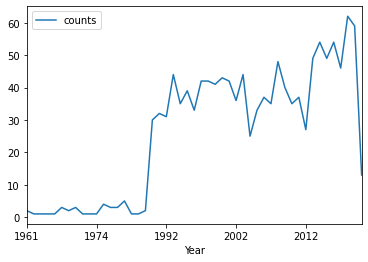

In [15]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

df_year.plot(kind='line',x='Year',y='counts')

Accidents in 1990's: 369  2000's: 383  2010's: 472  2020's: 13


Text(0.5, 1.0, 'Accidents between decades')

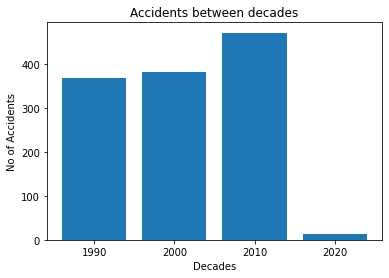

In [16]:

a1=0
b1=0
c1=0
d1=0

for data in df_air['date']:
    result = data.year
    result = str(result)
    if (result.startswith('201')):
            a1 = a1+1
    elif (result.startswith('200')):
            b1 = b1+1
    elif (result.startswith('199')):
            c1 = c1+1
    elif (result.startswith('202')):
            d1 = d1+1
year_rate = [c1,b1,a1,d1]
print("Accidents in 1990's:" ,c1 , " 2000's:" ,b1 ," 2010's:" , a1, " 2020's:", d1  )
years =['1990','2000','2010','2020']

pyplot.bar(years, year_rate)

# set x/y labels and plot title
plt.pyplot.xlabel("Decades")
plt.pyplot.ylabel("No of Accidents")
plt.pyplot.title("Accidents between decades")

In [17]:
df_aircraft = df_air['type'].value_counts().rename_axis('Aircraft').reset_index(name='counts')
df_aircraft = df_aircraft.set_index('Aircraft')
df_aircraft=df_aircraft.head(5)
df_aircraft

counts
Aircraft                   
Boeing 737-8AS (WL)      28
Airbus A320-232          23
Airbus A320-214          23
Airbus A321-231          19
Boeing 737               18

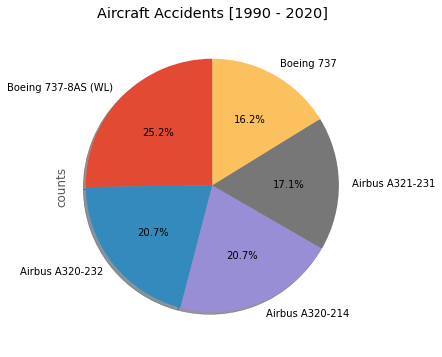

In [18]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style
df_aircraft['counts'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Aircraft Accidents [1990 - 2020]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [25]:
df_boeing

InvestigationType  EventDate        Location    City       Country  \
0            Accident 1997-03-22          MANAUS  Brazil        Brazil   
1            Accident 1997-03-21     VICTORVILLE      CA  UnitedStates   
2            Incident 1997-03-10      DFWAIRPORT      TX  UnitedStates   
3            Incident 1997-03-03         ATLANTA      GA  UnitedStates   
4            Accident 1997-03-02         CHICAGO      IL  UnitedStates   
..                ...        ...             ...     ...           ...   
802          Accident 1982-02-17           MIAMI      FL  UnitedStates   
803          Incident 1982-02-15         ONTARIO      CA  UnitedStates   
804          Accident 1982-02-06         MEDFORD      OR  UnitedStates   
805          Accident 1982-01-13      WASHINGTON      DC  UnitedStates   
806          Accident 1982-01-06  NEARBAKERSFIEL      CA  UnitedStates   

    AirportCode             AirportName InjurySeverity AircraftDamage  \
0          SBEG     EDUARDOGOMEZAIRPORT       Incident          Minor   
1           VCV  SOUTHERNCALIFORNIAINTL      Non-Fatal    Substantial   
2           DFW        DFWINTERNATIONAL       Incident          Minor   
3           NaN                     NaN       Incident          Minor   
4           NaN                     NaN      Non-Fatal            NaN   
..          ...                     ...            ...            ...   
802         MIA      MIAMIINTERNATIONAL      Non-Fatal    Substantial   
803         ONT    ONTARIOINTERNATIONAL       Incident          Minor   
804         MFR   MEDFORD-JACKSONCOUNTY      Non-Fatal          Minor   
805         NaN      WASHINGTONNATIONAL          Fatal      Destroyed   
806         NaN                     NaN      Non-Fatal    Substantial   

    RegistrationNumber     Model  NumberofEngines     EngineType  \
0               N707CK  747-269B              4.0       TurboFan   
1               N68800     B75N1              1.0  Reciprocating   
2               N909PG   727-2K5              3.0       TurboFan   
3               N465FE      727F              NaN        Unknown   
4               N755AT   757-2Q8              2.0       TurboFan   
..                 ...       ...              ...            ...   
802              N4734   727-235              3.0       TurboFan   
803             N73717  B737-2H4              2.0       TurboJet   
804             N56270     A75N1              1.0  Reciprocating   
805              N62AF   737-222              2.0       TurboFan   
806             N59737       A75              1.0  Reciprocating   

     TotalFatalInjuries  TotalSeriousInjuries  TotalMinorInjuries  \
0                     0                     0                 0.0   
1                     0                     0                 0.0   
2                     0                     0                 0.0   
3                     0                     0                 0.0   
4                     0                     4                18.0   
..                  ...                   ...                 ...   
802                   0                     1                 1.0   
803                   0                     0                 0.0   
804                   0                     0                 0.0   
805                   0                    78                 6.0   
806                   0                     1                 0.0   

     TotalUninjured WeatherCondition BroadPhaseofFlight  
0               7.0              VMC            LANDING  
1               2.0              VMC            LANDING  
2               4.0              VMC            TAKEOFF  
3               0.0              UNK           STANDING  
4             180.0              VMC            DESCENT  
..              ...              ...                ...  
802            51.0              VMC            TAKEOFF  
803           119.0              IMC           APPROACH  
804             3.0              VMC               TAXI  
805         

In [26]:
df_boeing =df_boeing.dropna()

In [88]:
df_boeing['NumberofEngines']=df_boeing['NumberofEngines'].astype(int)

C:\Users\VIMANIYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
AX = df_boeing['InvestigationType'].unique()
BX = df_boeing['EngineType'].unique()
CX = df_boeing['WeatherCondition'].unique()
DX = df_boeing['BroadPhaseofFlight'].unique()
AY = df_boeing['AircraftDamage'].unique()

In [32]:
df_boeing.dtypes

InvestigationType               object
EventDate               datetime64[ns]
Location                        object
City                            object
Country                         object
AirportCode                     object
AirportName                     object
InjurySeverity                  object
AircraftDamage                  object
RegistrationNumber              object
Model                           object
NumberofEngines                float64
EngineType                      object
TotalFatalInjuries               int64
TotalSeriousInjuries             int64
TotalMinorInjuries             float64
TotalUninjured                 float64
WeatherCondition                object
BroadPhaseofFlight              object
dtype: object

In [89]:
X = df_boeing[['InvestigationType','EngineType','WeatherCondition','BroadPhaseofFlight','NumberofEngines']].values
X[:5]

array([['Accident', 'TurboFan', 'VMC', 'LANDING', 4],
       ['Accident', 'Reciprocating', 'VMC', 'LANDING', 1],
       ['Incident', 'TurboFan', 'VMC', 'TAKEOFF', 3],
       ['Incident', 'TurboFan', 'VMC', 'TAXI', 2],
       ['Incident', 'TurboFan', 'IMC', 'TAKEOFF', 3]], dtype=object)

In [93]:
Y = df_boeing[['AircraftDamage']].values
Y[:5]

array([['Minor'],
       ['Substantial'],
       ['Minor'],
       ['Minor'],
       ['Minor']], dtype=object)

In [94]:
from sklearn import preprocessing
Inv = preprocessing.LabelEncoder()
Inv.fit(AX)
X[:,0] =Inv.transform(X[:,0])
X[0:5]

array([[0, 'TurboFan', 'VMC', 'LANDING', 4],
       [0, 'Reciprocating', 'VMC', 'LANDING', 1],
       [1, 'TurboFan', 'VMC', 'TAKEOFF', 3],
       [1, 'TurboFan', 'VMC', 'TAXI', 2],
       [1, 'TurboFan', 'IMC', 'TAKEOFF', 3]], dtype=object)

In [95]:
ET = preprocessing.LabelEncoder()
ET.fit(BX)
X[:,1] =ET.transform(X[:,1])
X[0:5]

array([[0, 1, 'VMC', 'LANDING', 4],
       [0, 0, 'VMC', 'LANDING', 1],
       [1, 1, 'VMC', 'TAKEOFF', 3],
       [1, 1, 'VMC', 'TAXI', 2],
       [1, 1, 'IMC', 'TAKEOFF', 3]], dtype=object)

In [96]:
WC = preprocessing.LabelEncoder()
WC.fit(CX)
X[:,2] =WC.transform(X[:,2])
X[0:5]

array([[0, 1, 2, 'LANDING', 4],
       [0, 0, 2, 'LANDING', 1],
       [1, 1, 2, 'TAKEOFF', 3],
       [1, 1, 2, 'TAXI', 2],
       [1, 1, 0, 'TAKEOFF', 3]], dtype=object)

In [97]:
BPF =preprocessing.LabelEncoder()
BPF.fit(DX)
X[:,3] =BPF.transform(X[:,3])
X[0:5]

array([[0, 1, 2, 5, 4],
       [0, 0, 2, 5, 1],
       [1, 1, 2, 8, 3],
       [1, 1, 2, 9, 2],
       [1, 1, 0, 8, 3]], dtype=object)

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 3)
print(x_train.shape, x_test.shape)

(299, 5) (75, 5)


In [123]:
AirTree = DecisionTreeClassifier(criterion="entropy", max_depth =4)
AirTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [124]:
AirTree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [125]:
predTree = AirTree.predict(x_test)

In [126]:
print(predTree[:5])
print(y_test[0:5])

['Substantial' 'Minor' 'Minor' 'Minor' 'Minor']
[['Substantial']
 ['Minor']
 ['Minor']
 ['Minor']
 ['Minor']]


In [127]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.9066666666666666


In [128]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import numpy as np

In [113]:
dot_data = StringIO()
filename = "airtree.png"
featureNames = ['InvestigationType','EngineType','WeatherCondition','BroadPhaseofFlight','NumberofEngines']
targetNames =  df_boeing['AircraftDamage'].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(400, 400))
plt.imshow(img,interpolation='nearest')

In [129]:
Z = df_boeing['InjurySeverity']

In [130]:
x_train,x_test,y_train,y_test = train_test_split(X,Z,test_size = 0.2 , random_state = 3)
print(x_train.shape, x_test.shape)

(299, 5) (75, 5)


In [131]:
InjuryTree = DecisionTreeClassifier(criterion="entropy", max_depth =4)
InjuryTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [132]:
InjuryTree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [133]:
pred_InjuryTree = InjuryTree.predict(x_test)

In [134]:
print(pred_InjuryTree[:5])
print(y_test[0:5])

['Non-Fatal' 'Incident' 'Incident' 'Incident' 'Incident']
307       Fatal
708    Incident
730    Incident
128    Incident
694    Incident
Name: InjurySeverity, dtype: object


In [135]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, pred_InjuryTree))

DecisionTrees's Accuracy:  0.9466666666666667


In [136]:
dot_data = StringIO()
filename = "InjuryTree.png"
featureNames = ['InvestigationType','EngineType','WeatherCondition','BroadPhaseofFlight','NumberofEngines']
targetNames =  df_boeing['InjurySeverity'].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(400, 400))
plt.imshow(img,interpolation='nearest')

In [138]:
CLIENT_ID = 'DBFMWGGQWRQFS2YJSMDER5LOCF52D4SLDCRD0ACGJRPY5QFE' # your Foursquare ID
CLIENT_SECRET = 'YDON4UTZKTVPJZEWDSJZLIUQWJEY2ZNOF01YT1P44IQMIT1Y' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DBFMWGGQWRQFS2YJSMDER5LOCF52D4SLDCRD0ACGJRPY5QFE
CLIENT_SECRET:YDON4UTZKTVPJZEWDSJZLIUQWJEY2ZNOF01YT1P44IQMIT1Y


In [149]:
df_boeing['Location'].value_counts()

MIAMI         19
CHICAGO       17
LOSANGELES    13
DENVER        13
ANCHORAGE     11
              ..
DELEVAN        1
EVERETT        1
COVINGTON      1
ROCHESTER      1
CHANTILLY      1
Name: Location, Length: 208, dtype: int64

In [195]:
df_boeing['BroadPhaseofFlight'].value_counts()

LANDING        118
TAKEOFF         85
TAXI            56
APPROACH        49
STANDING        17
MANEUVERING     12
CRUISE          10
CLIMB            9
DESCENT          9
GO-AROUND        9
Name: BroadPhaseofFlight, dtype: int64

In [153]:
address = 'MIAMI Airport'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of MIAMI are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of MIAMI are 25.7834634, -80.1775503.


In [187]:
LIMIT =100
radius = 300

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)

In [188]:
import requests
results = requests.get(url).json()

In [189]:
results

{'meta': {'code': 200, 'requestId': '5ebaebdced78b8001be6a3cb'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Downtown Miami',
  'headerFullLocation': 'Downtown Miami, Miami',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 5,
  'suggestedBounds': {'ne': {'lat': 25.7861634027, 'lng': -80.17455737602023},
   'sw': {'lat': 25.780763397299996, 'lng': -80.18054322397975}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '570accd9498e4f01ddd49c33',
       'name': 'The Deck at Island Gardens',
       'location': {'address': '882 McArthur Causway',
        'lat': 25.784907269130784,
        'lng': -80.17811332936976,
        'labeledLatLngs': [{'label': 'display',
     

In [190]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [191]:
from pandas.io.json import json_normalize
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name          categories        lat        lng
0        The Deck at Island Gardens  Seafood Restaurant  25.784907 -80.178113
1           Miami Children's Museum              Museum  25.783800 -80.176474
2  Subway @ Miami Children's Museum      Sandwich Place  25.784718 -80.176438
3              Island Gardens Miami       Boat or Ferry  25.784545 -80.178769
4           Miami Seaplane Base X44             Airport  25.783064 -80.177012

In [192]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

5 venues were returned by Foursquare.


In [194]:
import folium # map rendering library

# create map of New York using latitude and longitude values
map_accident = folium.Map(location=[latitude, longitude], zoom_start=18)

# add markers to map
for lat, lng, name,  categories in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['name'], nearby_venues['categories']):
    label = '{}, {}'.format(name, categories)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_accident)  
    
map_accident